# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_mouse_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
merged_mouse_df["Mouse ID"].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_df = merged_mouse_df[merged_mouse_df.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False)]
duplicated_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_mouse_df = merged_mouse_df[merged_mouse_df["Mouse ID"] != "g989"]

In [7]:
# Checking the number of mice in the clean DataFrame.
merged_mouse_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mouse_mean = merged_mouse_df["Tumor Volume (mm3)"].groupby(merged_mouse_df["Drug Regimen"]).mean()
mouse_median = merged_mouse_df["Tumor Volume (mm3)"].groupby(merged_mouse_df["Drug Regimen"]).median()
mouse_var = merged_mouse_df["Tumor Volume (mm3)"].groupby(merged_mouse_df["Drug Regimen"]).var()
mouse_standev = merged_mouse_df["Tumor Volume (mm3)"].groupby(merged_mouse_df["Drug Regimen"]).std()
mouse_sem = merged_mouse_df["Tumor Volume (mm3)"].groupby(merged_mouse_df["Drug Regimen"]).sem()


collected_mouse = pd.DataFrame({"Mean Tumor Volume":mouse_mean, "Median Tumor Volume": mouse_median, "Tumor Volume Variance": mouse_var, "Tumor Volume Std. Dev.": mouse_standev,
                                "Tumor Volume Std. Err.": mouse_sem})



collected_mouse

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

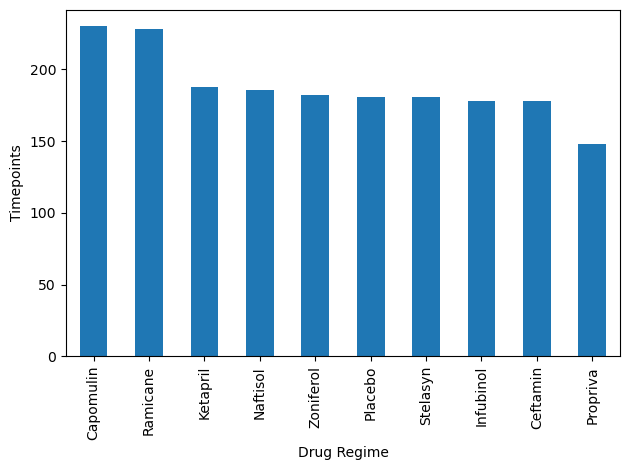

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

Regimen = merged_mouse_df["Drug Regimen"].value_counts()

Regimen.plot(kind='bar')
plt.xlabel('Drug Regime')
plt.ylabel('Timepoints')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

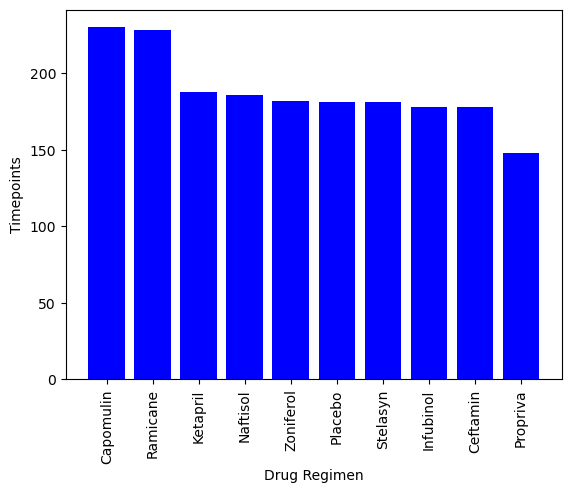

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = Regimen.index.values
y_axis = Regimen.values


plt.bar(x_axis, y_axis, color='b', align='center')
plt.xlabel("Drug Regimen")
plt.ylabel('Timepoints')
plt.xticks(rotation="vertical")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

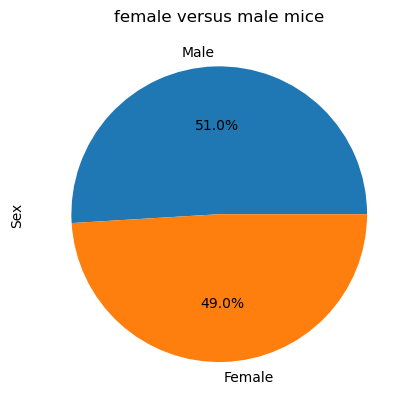

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_mvf = merged_mouse_df["Sex"].value_counts()
mice_mvf.plot(kind='pie', autopct= "%1.1f%%")

plt.title("female versus male mice")
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

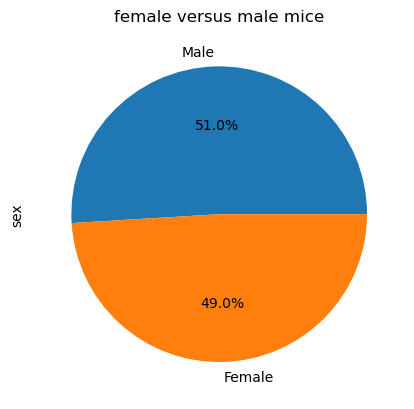

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["male", "female"]
sizes = [49, 51]
plot = mice_mvf.plot.pie(y ="Total Count", autopct= "%1.1f%%")

plt.title("female versus male mice")
plt.ylabel("sex")
plt.show

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_ftv = merged_mouse_df.loc[merged_mouse_df["Drug Regimen"] == "Capomulin"]
Ramicane_ftv = merged_mouse_df.loc[merged_mouse_df["Drug Regimen"] == "Ramicane"]
Infubinol_ftv = merged_mouse_df.loc[merged_mouse_df["Drug Regimen"] == "Infubinol"]
Ceftamin_ftv = merged_mouse_df.loc[merged_mouse_df["Drug Regimen"] == "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_time = Capomulin_ftv.groupby('Mouse ID').max()['Timepoint']
Ramicane_time = Ramicane_ftv.groupby('Mouse ID').max()['Timepoint']
Infubinol_time = Infubinol_ftv.groupby('Mouse ID').max()['Timepoint']
Ceftamin_time = Ceftamin_ftv.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse_df = pd.DataFrame(["Capomulin growth", Capomulin_time,
                                    "Ramicane growth", Ramicane_time,
                                    "Infubinol growth", Infubinol_time,
                                    "Ceftamin growth", Ceftamin_time])



In [104]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for x in Treatments:
    quartiles = [x].quantile([.25,.5,.75]).round(2)

    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
  
    iqr = round(upperq-lowerq,2)
  
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

AttributeError: 'list' object has no attribute 'quantile'

## Line and Scatter Plots

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


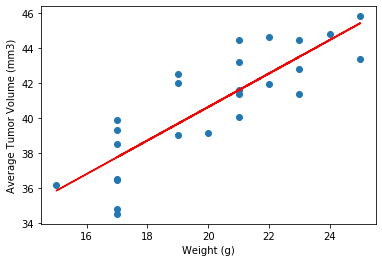

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

